Employee Score Calculation

1. Monthly Score Calculation

In [23]:
import pandas as pd


df = pd.read_csv('sentimental_labeling.csv')

df['timestamp'] = pd.to_datetime(df['date'])


df['year_month'] = df['timestamp'].dt.to_period('M').astype(str)


score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['score'] = df['sentiment'].map(score_map)


monthly_score = df.groupby(['from', 'year_month'])['score'].sum().reset_index()


monthly_score.rename(columns={
    'from': 'employee',
    'score': 'monthly_sentiment_score'
}, inplace=True)

monthly_score.to_csv('monthly_employee_scores.csv')

monthly_score

,employee,year_month,monthly_sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,8
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,3
...,...,...,...
235,sally.beck@enron.com,2011-08,3
236,sally.beck@enron.com,2011-09,0
237,sally.beck@enron.com,2011-10,5
238,sally.beck@enron.com,2011-11,5


2. Employees Score Visualization

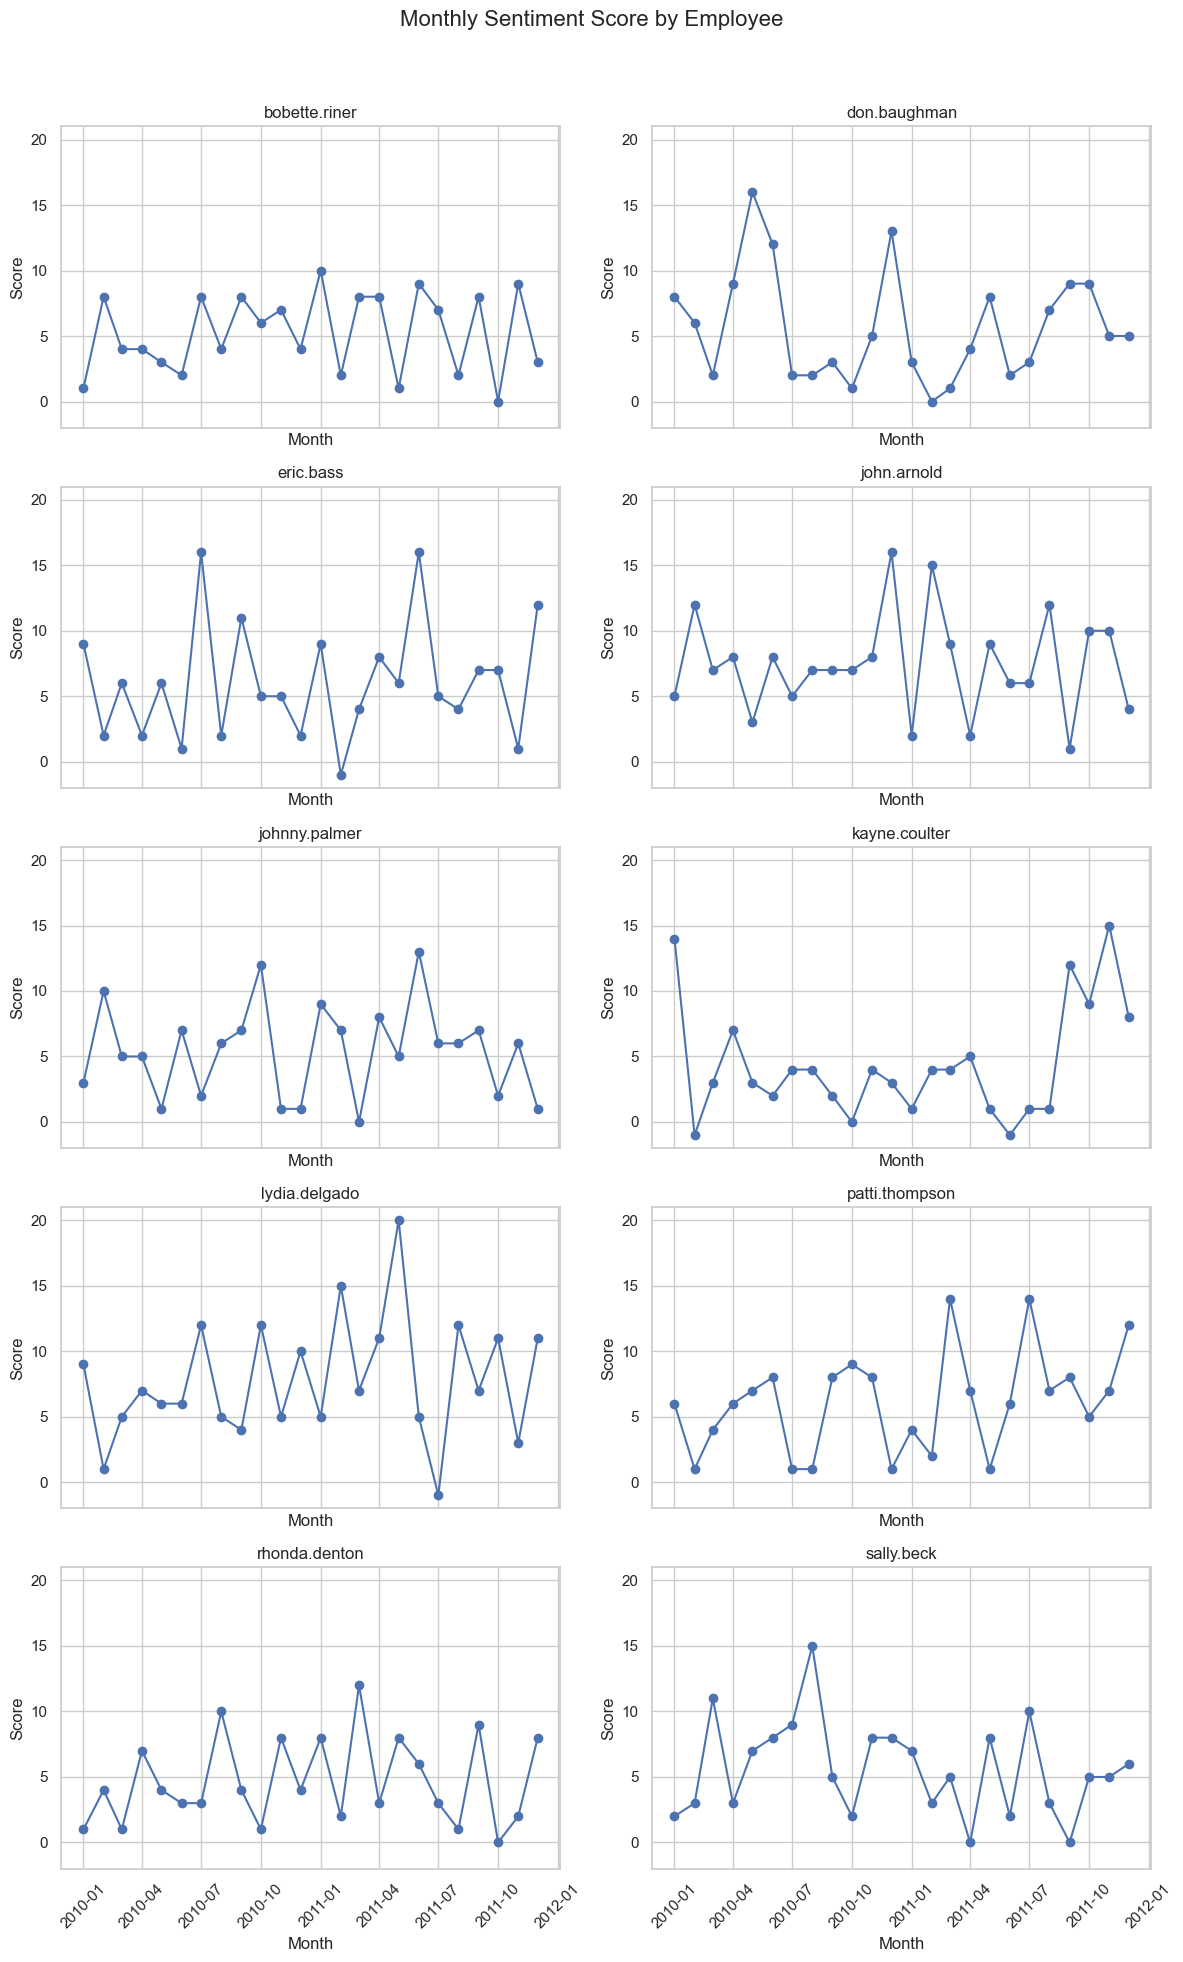

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('monthly_employee_scores.csv')
df['year_month'] = pd.to_datetime(df['year_month'])


employees = df['employee'].unique()
n_employees = len(employees)


fig, axes = plt.subplots(5, 2, figsize=(12, 20), sharex=True)
axes = axes.flatten()  


for i, emp in enumerate(employees):
    emp_data = df[df['employee'] == emp]
    axes[i].plot(emp_data['year_month'], emp_data['monthly_sentiment_score'], marker='o')
    axes[i].set_title(emp.split('@')[0])  
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(-2, 21)

fig.suptitle('Monthly Sentiment Score by Employee', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
